# GROUP PROPOSAL:

## Introduction

Basketball statistics are statistical measures of a player's performance throughout a game and the stats are typically collected through cameras feeding data into proprietary software in the NBA. These statistics are analyzed to help teams to identify who exceeds in specific areas and plays a part on whether the player receives incentive compensations.

Because this data contained a lot of information about NBA players, we were curious to see if certain variables enable the player to have higher salaries than others. Therefore, the question we hope to answer with our project is: "Which basketball statistics enable players to have higher salaries?" Furthermore, we want test to see if we can determine a players salary based on these statistically significant variables.

The dataset we will be using is the 2021-2022 NBA Player Stats(retrieved from kaggle.com/datasets/vivovinco/nba-player-stats), which is an aggregate of NBA player stats from the 2021-2022 regular season. We also obtained the salaries of each player from  a NBA Player Salaries dataset(retrieved from https://hoopshype.com/salaries/players/l/) which we will merge with the NBA Player Stats dataset.
The collected data contains stats of all NBA players from the season where each team plays 82 games. Our variables of interest has yet to be decided but will be determine by using analysis techniques(confounding variables, correlation matrix).

Response variable: 
- Salary : How much a player makes for the year 2021-2022 in $USD

30 possible variables:
- Rk : Rank
- Player : Player's name
- Pos : Position
- Age : Player's age
- Tm : Team
- G : Games played
- GS : Games started
- MP : Minutes played per game
- FG : Field goals per game
- FGA : Field goal attempts per game
- FG% : Field goal percentage
- 3P : 3-point field goals per game
- 3PA : 3-point field goal attempts per game
- 3P% : 3-point field goal percentage
- 2P : 2-point field goals per game
- 2PA : 2-point field goal attempts per game
- 2P% : 2-point field goal percentage
-  eFG% : Effective field goal percentage
- FT : Free throws per game
- FTA : Free throw attempts per game
- FT% : Free throw percentage
- ORB : Offensive rebounds per game
- DRB : Defensive rebounds per game
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

This dataset contains a total of 812 players.

## Preliminary Results

### Loading library

In [24]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(GGally)
library(rvest)
library(AER)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




ERROR: Error in library(AER): there is no package called ‘AER’


### Reading data: Player Data 
Since player data was found on Kaggle - data was downloaded and read in locally. 
This data set shows player stats for 217 NBA players in 2021-2022. This includes 30 different columns of information, not all of which will be used. 

In [1]:
data <- read.csv("data.csv",sep=";")
head(data)
tail(data)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
3,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
4,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
5,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
6,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
807,601,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,...,0.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1
808,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
809,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
810,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
811,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2
812,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,...,0.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3


In [26]:
str(data)

'data.frame':	812 obs. of  30 variables:
 $ Rk    : int  1 2 3 4 5 6 6 6 7 8 ...
 $ Player: chr  "Precious Achiuwa" "Steven Adams" "Bam Adebayo" "Santi Aldama" ...
 $ Pos   : chr  "C" "C" "C" "PF" ...
 $ Age   : int  22 28 24 21 36 23 23 23 26 23 ...
 $ Tm    : chr  "TOR" "MEM" "MIA" "MEM" ...
 $ G     : int  73 76 56 32 47 65 50 15 66 56 ...
 $ GS    : int  28 75 56 0 12 21 19 2 61 56 ...
 $ MP    : num  23.6 26.3 32.6 11.3 22.3 22.6 26.3 9.9 27.3 32.3 ...
 $ FG    : num  3.6 2.8 7.3 1.7 5.4 3.9 4.7 1.1 3.9 6.6 ...
 $ FGA   : num  8.3 5.1 13 4.1 9.7 10.5 12.6 3.2 8.6 9.7 ...
 $ FG.   : num  0.439 0.547 0.557 0.402 0.55 0.372 0.375 0.333 0.448 0.677 ...
 $ X3P   : num  0.8 0 0 0.2 0.3 1.6 1.9 0.7 2.4 0 ...
 $ X3PA  : num  2.1 0 0.1 1.5 1 5.2 6.1 2.2 5.9 0.2 ...
 $ X3P.  : num  0.359 0 0 0.125 0.304 0.311 0.311 0.303 0.409 0.1 ...
 $ X2P   : num  2.9 2.8 7.3 1.5 5.1 2.3 2.8 0.4 1.5 6.6 ...
 $ X2PA  : num  6.1 5 12.9 2.6 8.8 5.3 6.5 1 2.7 9.6 ...
 $ X2P.  : num  0.468 0.548 0.562 0.56 0.

### Reading Data: Salary Data - from Web
Demonstrating that a dataset can be read from web, we found the salary of the 217 NBA players from 2021-2022. This only includes two columns - X1 (Player Name) and X2 (Player Salary) 

In [27]:
salary_html <- read_html("https://hoopshype.com/salaries/players/2021-2022.html") %>%
                html_nodes("tbody .name , tbody .hh-salaries-sorted") %>%
                html_text()
salary <- str_replace_all(salary_html, "[\t\n$,]" , "")
salary_data = data.frame(matrix(salary,ncol=2,byrow=T),
                stringsAsFactors=FALSE)
head(salary_data)

,X1,X2
,<chr>,<chr>
1,Stephen Curry,48070014
2,John Wall,47345760
3,Russell Westbrook,47063478
4,LeBron James,44474988
5,Kevin Durant,44119845
6,Bradley Beal,43279250


### Merging Datasets
In order to create the final dataset to use, we combine the two datasets to add Salary into the the player data collected from Kaggle - with the X1 column being the same as the player column in order to ensure that the salary column is associated with the right players. 

In [31]:
data_all <- merge(data, salary_data, by.x = "Player", by.y = "X1")
head(data_all)

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,X2
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Aaron Gordon,198,PF,26,DEN,75,75,31.7,5.8,11.1,⋯,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,19690909
2,Aaron Holiday,244,PG,25,TOT,63,15,16.2,2.4,5.4,⋯,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,1968175
3,Aaron Holiday,244,PG,25,WAS,41,14,16.2,2.4,5.2,⋯,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1,1968175
4,Aaron Holiday,244,PG,25,PHO,22,1,16.3,2.3,5.6,⋯,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8,1968175
5,Aaron Nesmith,406,SF,22,BOS,52,3,11.0,1.4,3.5,⋯,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3804360
6,Aaron Wiggins,581,SG,23,OKC,50,35,24.2,3.1,6.7,⋯,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1563518


### Wrangling data
Since we are only using Field Goal Percentage (FG.), Total Points (PTS), Total Rebounds (TRB), and Assists (AST) - as mentioned in the introduction - we remove any duplicate or useless columns, change column name and type for simplicity, and remove rows having NULL. 

In [36]:
colnames(data_all)[which(names(data_all) == "X2")] <- "SALARY"
head(data_all)

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SALARY
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Aaron Gordon,198,PF,26,DEN,75,75,31.7,5.8,11.1,⋯,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,19690909
2,Aaron Holiday,244,PG,25,TOT,63,15,16.2,2.4,5.4,⋯,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,1968175
3,Aaron Holiday,244,PG,25,WAS,41,14,16.2,2.4,5.2,⋯,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1,1968175
4,Aaron Holiday,244,PG,25,PHO,22,1,16.3,2.3,5.6,⋯,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8,1968175
5,Aaron Nesmith,406,SF,22,BOS,52,3,11.0,1.4,3.5,⋯,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3804360
6,Aaron Wiggins,581,SG,23,OKC,50,35,24.2,3.1,6.7,⋯,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1563518


In [38]:
clean_data <- data_all %>%
    select(FG., PTS, TRB, AST, SALARY) %>%
    transform(SALARY = as.numeric(SALARY)) %>%
    filter_all(any_vars(! is.na(.)))
head(clean_data)

,FG.,PTS,TRB,AST,SALARY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.520,15.0,5.9,2.5,19690909
2,0.447,6.3,1.9,2.4,1968175
3,0.467,6.1,1.6,1.9,1968175
4,0.411,6.8,2.5,3.4,1968175
5,0.396,3.8,1.7,0.4,3804360
6,0.463,8.3,3.6,1.4,1563518


In [40]:
sapply(clean_data, function(x) sum(is.na(x))) #confirming there are no nulls

FG.    PTS    TRB    AST SALARY 
     0      0      0      0      0

No nulls in any column.

## Plotting Data
Visually explore the association between variables in the dataset using pair plots

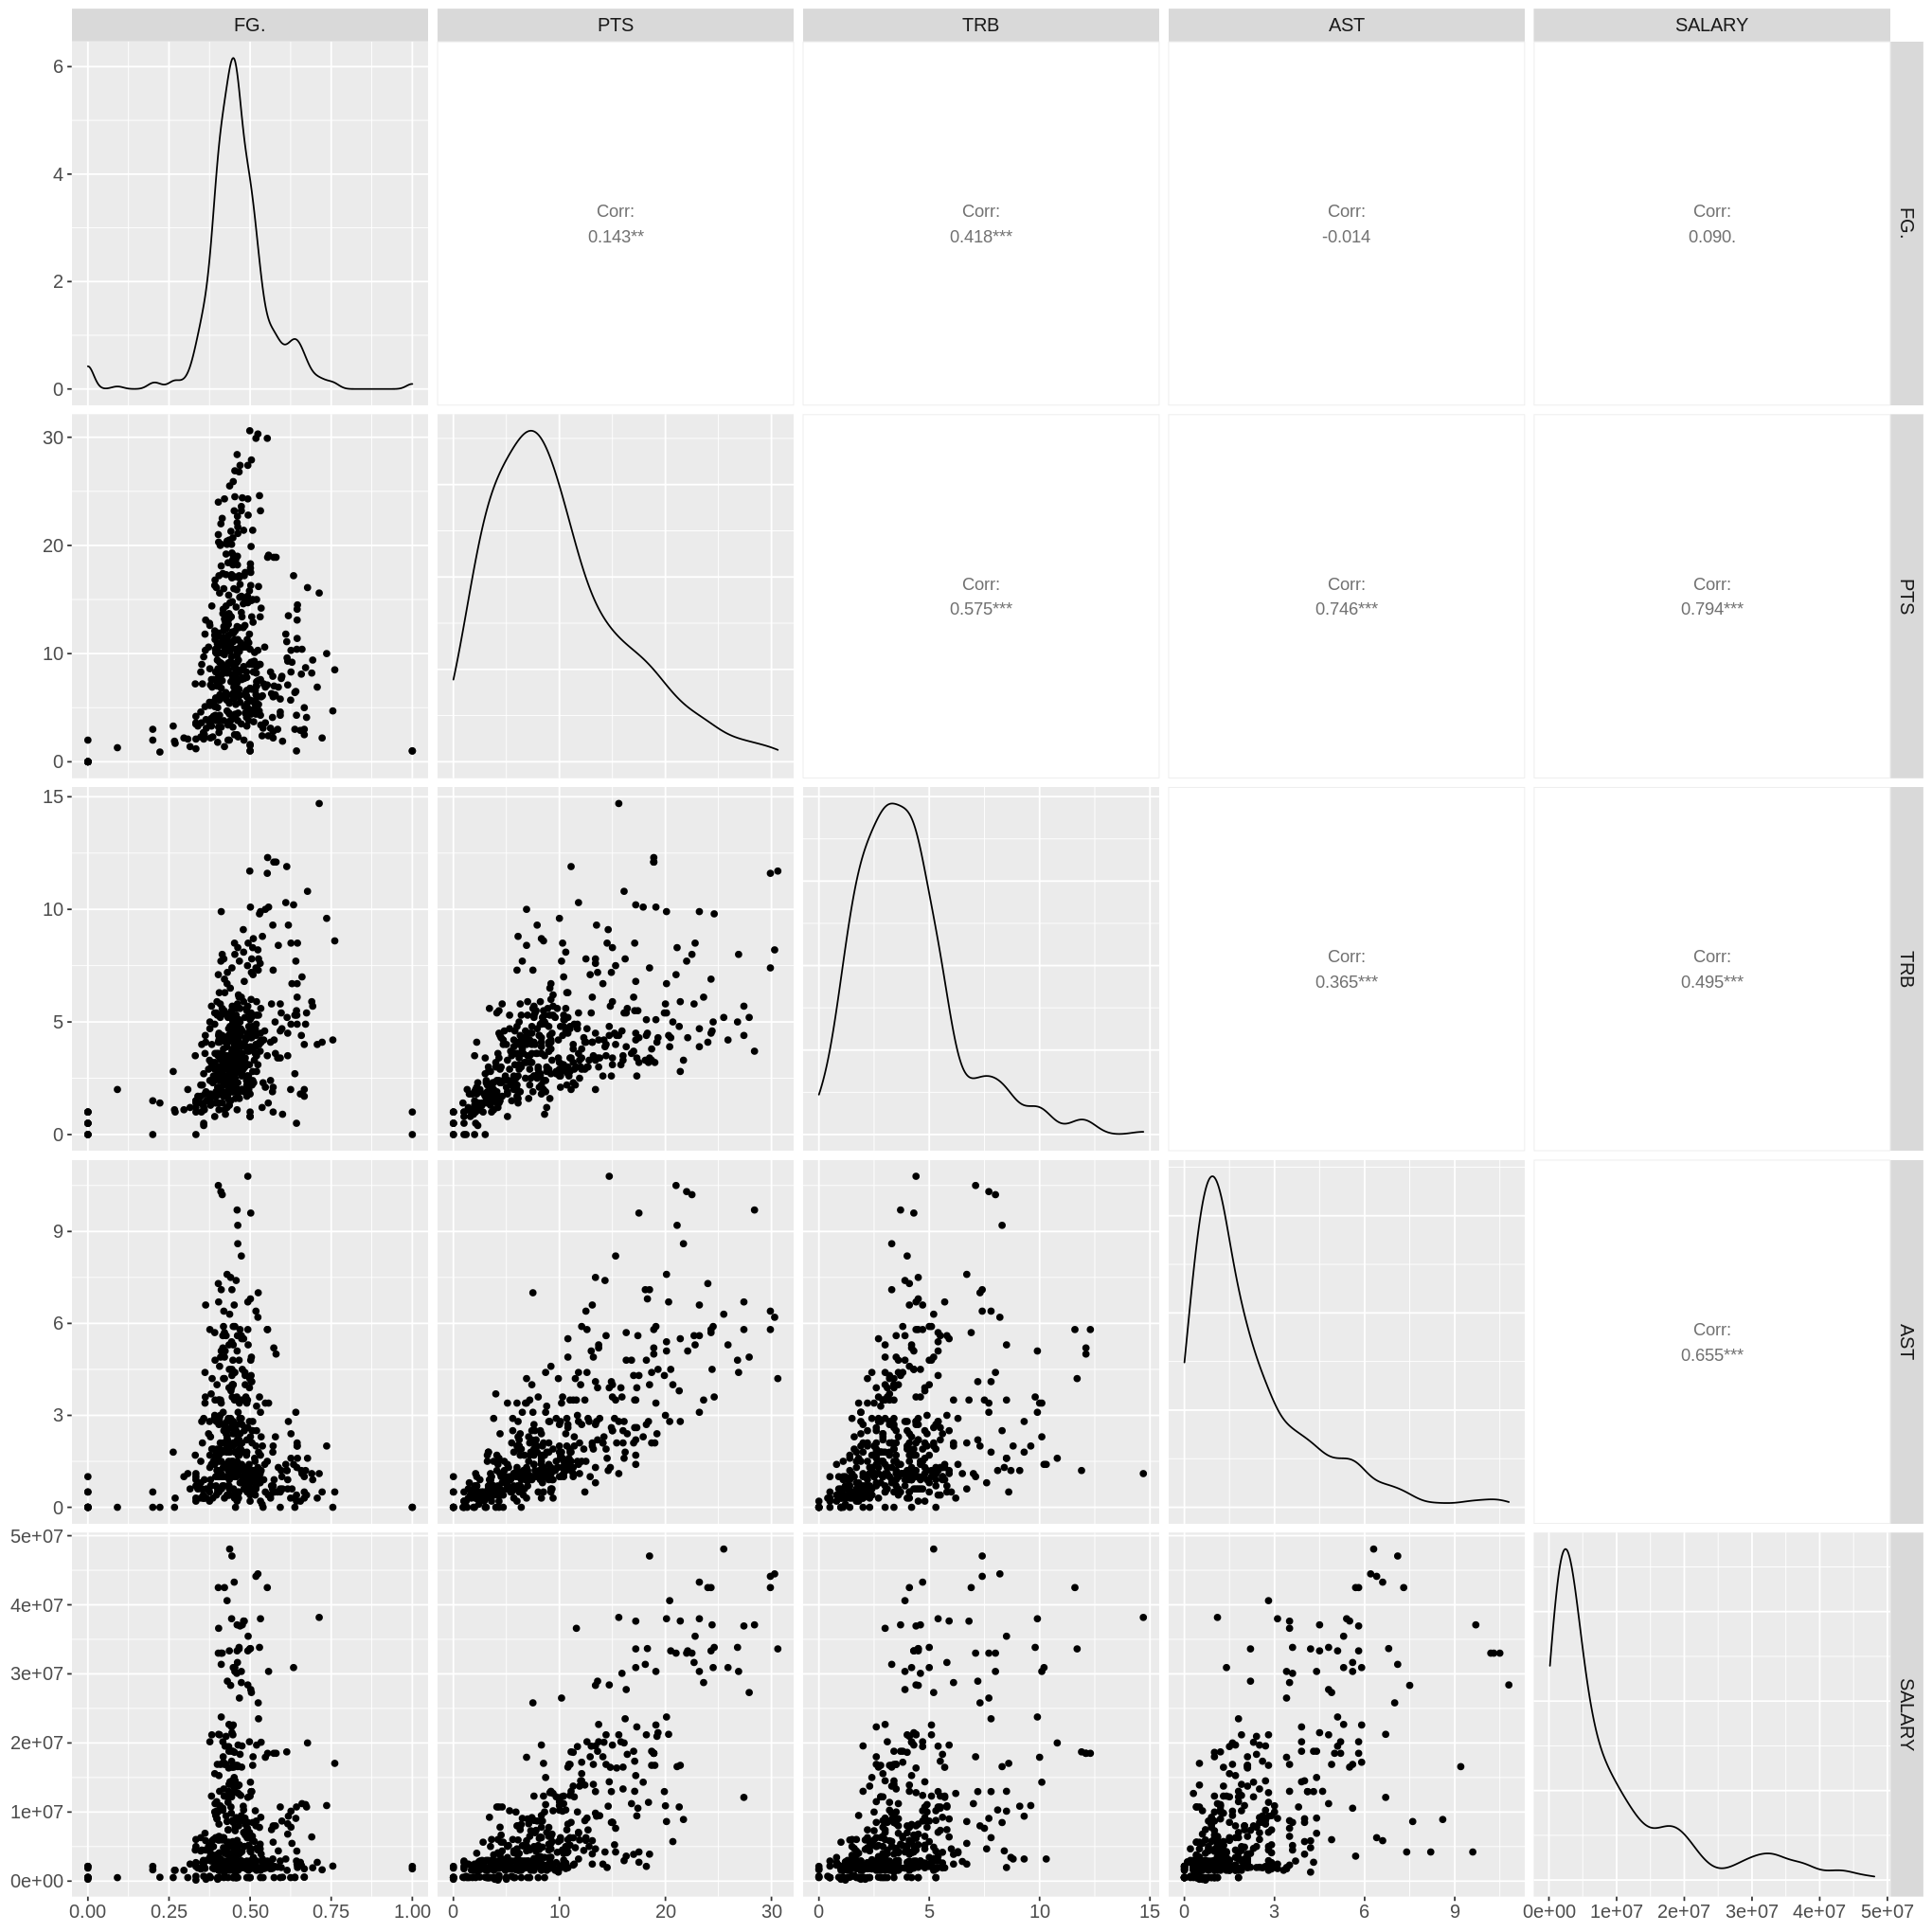

In [41]:
data_pair_plots <- 
  clean_data %>% 
  select(FG., PTS, TRB, AST, SALARY) %>%
  ggpairs() +
    theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
options(repr.plot.width = 17, repr.plot.height = 17)
data_pair_plots

In [46]:
corr_matrix <- clean_data %>% 
  select(FG., PTS, TRB, AST) %>% #salary not included as it is our response variable
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr") %>%
  filter(corr != 1) %>%
  arrange(desc(corr))
head(corr_matrix)

var1,var2,corr
<chr>,<chr>,<dbl>
PTS,AST,0.7463273
AST,PTS,0.7463273
PTS,TRB,0.5753114
TRB,PTS,0.5753114
FG.,TRB,0.4181244
TRB,FG.,0.4181244


From this we can see that Points per Game and Assists can be considered highly correlated - introducing a 
multicollinearity problem, we will attempt to resolve this further in our analysis

## Methods: Plan
- For our project, we want to answer the question : Can we use four input variables, of NBA perfomance metrics ( total points per game, field goal percentage, assists per game, and total rebounds per game ) to accurately predict the salary of NBA players? The main benefit of completing this project is that is gives NBA teams - who already have a budjet of how much they can spend on their players - a better udnerstanding which players they should sign based on their stats, and how much this play is worth. 

- The method we will be using are a Multiple Linear Regression Analysis in order to create a model to predict salary. In order to better determine variables to be used, a visualization of the correlation matrix (a pairwise plot) was already completed. We will also be using the following evaluation metrics for our model: Mean Squared Error, R-squared, Adjusted R-squared, and Mallow's Cp. 

- The main goal we hope to achieve is to use the collected data to create a model to predict salary, that could theoreticallt be used by teams and a player's manager in order to negotiate salaries and contracts that best reflect how said player is doing, and establish a level of performance they expect from the player once signed to the team. 


## References

Wikipedia contributors. (2021, January 7). Player tracking (National Basketball Association). Wikipedia. https://en.wikipedia.org/wiki/Player_tracking_(National_Basketball_Association)

Academy, S. U. S. (2018, July 13). Determinants of NBA Player Salaries. The Sport Journal. https://thesportjournal.org/article/determinants-of-nba-player-salaries/

Academy, S. U. S. (2018a, June 19). NBA Players’ Pay and Performance: What Counts? The Sport Journal. https://thesportjournal.org/article/nba-players-pay-and-performance-what-counts/